In [10]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Twitter API keys
from config import (consumer_key,consumer_secret,access_token,access_token_secret)

# Import and initialize sentiment analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Target User Accounts - CHECK THESE!!
target_user = ("@BBCWorld", "@CBSNews", "@CNNbrk", "@FoxNews", "@NYTimes")

# Add "Tweets Ago" Counter
counter = 1

# List for dictionaries of results
for user in target_user:
    
    # Variable for holding sentiments
    sentiments = []
    
    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(1, 6):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, page=x)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add sentiments for each tweet into a list and create a dictionary of results
            sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neg,
                           "Neutral": neu,
                           "Tweets Ago": counter,
                           "Media Sources": user,
                           "Text": tweet["text"]
                           })
        
            # Add to "Tweets Ago" counter 
            counter += 1

# convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments).set_index("Media Sources").round(3)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Text,Tweets Ago
Media Sources,,,,,,,
@NYTimes,0.200,Sun Jul 15 03:41:25 +0000 2018,0.0,0.921,0.079,The Kardashians picked up right where the Simp...,401
@NYTimes,0.361,Sun Jul 15 03:24:20 +0000 2018,0.0,0.889,0.111,Andy Samberg on the cancelation and revival of...,402
@NYTimes,0.000,Sun Jul 15 03:06:17 +0000 2018,0.0,1.000,0.000,Earlier generations of hip-hop stars lived the...,403
@NYTimes,0.402,Sun Jul 15 02:49:33 +0000 2018,0.0,0.886,0.114,In Opinion \n\nOp-Ed contributor Tina Rosenber...,404
@NYTimes,0.791,Sun Jul 15 02:31:02 +0000 2018,0.0,0.731,0.269,The suburban sprawl around Paris is home to th...,405


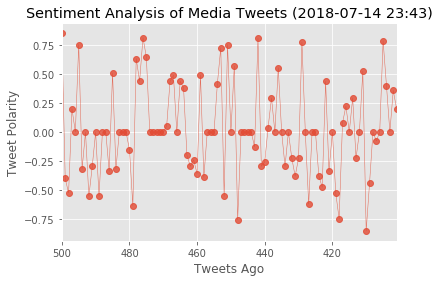

In [13]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
#fig, ax = plt.subplots()
#for key, grp in sentiments_pd.groupby(['Media Sources']):
 #   ax = grp.plot(ax=ax, kind='line', x='Tweets Ago', y='Compound', c=key, label=key)
plt.plot(x_vals,
        y_vals, marker="o", linewidth=0.5,
       alpha=0.8)

# Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()
